In [68]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 


In [69]:
# number of training samples to create
n_samples = 10000
# `m` and `c` are coefficient and bias to get the initial `y`
m = 9
c = -2
mean = 0.0 # mean of the training data distribution to create
std = 1.0 # standard deviation of the of the training data distribution to create
# number of training epochs 
num_epochs = 3000
# learning rate
learning_rate = 0.001

In [70]:
def create_dataset(n_samples, m, c):
    # create the sample dataset
    x = np.random.normal(mean, std, n_samples)
    random_noise = np.random.normal(mean, std, n_samples)
    y = m*x + c + random_noise
    x_train, y_train = x[:8000], y[:8000]
    
    
    x_test, y_test = x[8000:], y[8000:]
   
    
    return x_train, y_train, x_test, y_test

Training samples: 8000
Test samples: 2000


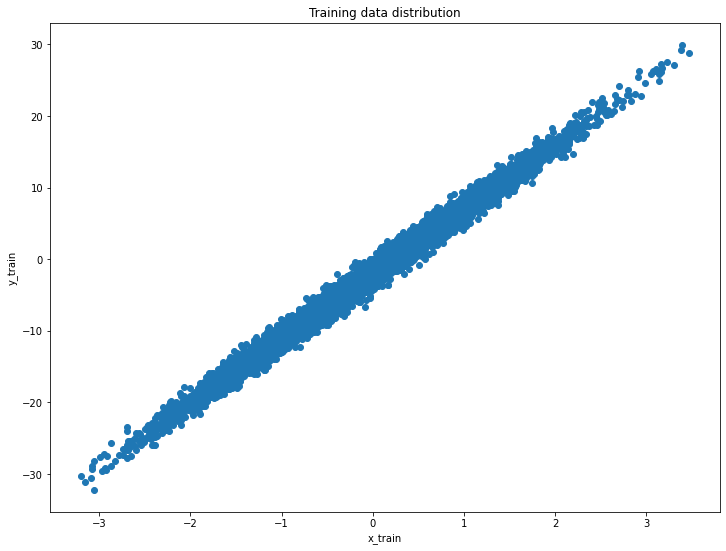

In [71]:
x_train, y_train, x_test, y_test=create_dataset(n_samples,m,c)

print(f"Training samples: {len(x_train)}")
print(f"Test samples: {len(x_test)}")
plt.figure(figsize=(12, 9))
plt.scatter(x_train, y_train)
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.title('Training data distribution')
plt.savefig('training_data.jpg')

In [72]:
x_train=np.array(x_train).reshape((x_train.shape[0],1))
x_test=np.array(x_test).reshape((x_test.shape[0],1))
y_train=np.array(y_train).reshape((y_train.shape[0],1))
y_test=np.array(y_test).reshape((y_test.shape[0],1))

In [73]:
#W = tf.Variable(np.random.randn())
#B = tf.Variable(np.random.randn())
##print(W)
#print(B)

In [144]:
class LinearModel(tf.keras.Model):
    
    def __init__(self,input_dim,units=1):
        super(LinearModel,self).__init__()
        self.weight=tf.Variable(np.random.randn(input_dim,units),trainable=True)
        self.bias=tf.Variable(np.zeros(units),trainable=True)
        
        #self.weight = self.add_weight(shape=(input_dim, units),initializer="random_normal",trainable=True)
        #self.bias = self.add_weight(shape=(units,), initializer="random_normal", trainable=True)

    def forward(self,xb):
        self.y_pred=tf.matmul(xb, self.weight) + self.bias 
        
        return  self.y_pred  
    def mse(self,y_true):
        self.loss=tf.reduce_mean(tf.square(tf.subtract(y_true,self.y_pred)))
        
        return self.loss 
    
    
    


In [146]:
model=LinearModel(x_train.shape[1])
y_pred=model.forward(x_train)
loss=model.mse(y_train)




In [147]:
def fit():
    for epoch in range(100):
        with tf.GradientTape() as tape:
            y_pred=model.forward(x_train)
        
            loss=model.mse(y_train)
        grads=tape.gradient(loss,[model.weight,model.bias])
        model.weight.assign_sub(grads[0]*0.01)
        model.bias.assign_sub(grads[1]*0.01)
        if epoch%10==0:
            print('epoch {} loss {}'.format(epoch,loss.numpy()))

    
  


In [148]:
fit()

epoch 0 loss 57.71556380537883
epoch 10 loss 38.70537562908223
epoch 20 loss 26.063125488967096
epoch 30 loss 17.655528417214313
epoch 40 loss 12.064019586997226
epoch 50 loss 8.345279553385463
epoch 60 loss 5.8720047786220935
epoch 70 loss 4.227031954435578
epoch 80 loss 3.132937131014388
epoch 90 loss 2.405222443032235


In [153]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers


import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [155]:
inputs = keras.Input(shape=(x_train.shape))
#l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(1, name='regression')(inputs)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))

model.fit(x_train,y_train, epochs=10,batch_size=32)






Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 8000, 1)]         0         
                                                                 
 regression (Dense)          (None, 8000, 1)           2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 1.9801
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.9659
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.9668
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.9671
Epoch 5/10
250/250 [==============================] - 0s 2ms/step - loss: 0.9666
Epoch 6/10
250/250 [==============================]

In [161]:
x_train.shape
x.shape

(100, 2)

In [167]:
n = 100

d = 2
x = np.random.uniform(-1, 1, (n, d))

# y = 5x + 10
weights_true = np.array([[5],[5]])
bias_true = np.array([10])

y_true = x @ weights_true + bias_true
#plt.scatter(x[:,0],y_true)


inputs = keras.Input(shape=(x.shape[1],))
#l1 = layers.Dense(10, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(1, name='regression')(inputs)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))




Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 2)]               0         
                                                                 
 regression (Dense)          (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


In [168]:
model.fit(x,y_true, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 6ms/step - loss: 75.7877
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 18.0450
Epoch 3/10
4/4 [==============================] - 0s 3ms/step - loss: 7.1559
Epoch 4/10
4/4 [==============================] - 0s 4ms/step - loss: 3.8244
Epoch 5/10
4/4 [==============================] - 0s 2ms/step - loss: 2.2187
Epoch 6/10
4/4 [==============================] - 0s 2ms/step - loss: 1.1760
Epoch 7/10
4/4 [==============================] - 0s 2ms/step - loss: 0.6412
Epoch 8/10
4/4 [==============================] - 0s 2ms/step - loss: 0.3652
Epoch 9/10
4/4 [==============================] - 0s 6ms/step - loss: 0.2071
Epoch 10/10
4/4 [==============================] - 0s 4ms/step - loss: 0.1088
